In [1]:
from pyspark.sql import SQLContext
from pyspark.sql import Row
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# generate RDD

In [2]:
localFile = sc.textFile("file:///etc/passwd")
rdd = localFile.map(lambda line : line.split(":"))
rdd.take(5)

[[u'root', u'x', u'0', u'0', u'root', u'/root', u'/bin/bash'],
 [u'bin', u'x', u'1', u'1', u'bin', u'/bin', u'/sbin/nologin'],
 [u'daemon', u'x', u'2', u'2', u'daemon', u'/sbin', u'/sbin/nologin'],
 [u'adm', u'x', u'3', u'4', u'adm', u'/var/adm', u'/sbin/nologin'],
 [u'lp', u'x', u'4', u'7', u'lp', u'/var/spool/lpd', u'/sbin/nologin']]

# generate DataFrame

In [3]:
rows = rdd.map(lambda t : 
    Row(
        username = t[0],
        password = t[1],
        userId = int(t[2]),
        groupId = int(t[3]),
        userIdInfo = t[4],
        homeDirectory = t[5],
        commandShell = t[6]
    )
)
rows.take(5)

[Row(commandShell=u'/bin/bash', groupId=0, homeDirectory=u'/root', password=u'x', userId=0, userIdInfo=u'root', username=u'root'),
 Row(commandShell=u'/sbin/nologin', groupId=1, homeDirectory=u'/bin', password=u'x', userId=1, userIdInfo=u'bin', username=u'bin'),
 Row(commandShell=u'/sbin/nologin', groupId=2, homeDirectory=u'/sbin', password=u'x', userId=2, userIdInfo=u'daemon', username=u'daemon'),
 Row(commandShell=u'/sbin/nologin', groupId=4, homeDirectory=u'/var/adm', password=u'x', userId=3, userIdInfo=u'adm', username=u'adm'),
 Row(commandShell=u'/sbin/nologin', groupId=7, homeDirectory=u'/var/spool/lpd', password=u'x', userId=4, userIdInfo=u'lp', username=u'lp')]

In [4]:
sqlContext = SQLContext(sc)
df = sqlContext.createDataFrame(rows)
df.printSchema()

root
 |-- commandShell: string (nullable = true)
 |-- groupId: long (nullable = true)
 |-- homeDirectory: string (nullable = true)
 |-- password: string (nullable = true)
 |-- userId: long (nullable = true)
 |-- userIdInfo: string (nullable = true)
 |-- username: string (nullable = true)



In [5]:
df.show(5)

+-------------+-------+--------------+--------+------+----------+--------+
| commandShell|groupId| homeDirectory|password|userId|userIdInfo|username|
+-------------+-------+--------------+--------+------+----------+--------+
|    /bin/bash|      0|         /root|       x|     0|      root|    root|
|/sbin/nologin|      1|          /bin|       x|     1|       bin|     bin|
|/sbin/nologin|      2|         /sbin|       x|     2|    daemon|  daemon|
|/sbin/nologin|      4|      /var/adm|       x|     3|       adm|     adm|
|/sbin/nologin|      7|/var/spool/lpd|       x|     4|        lp|      lp|
+-------------+-------+--------------+--------+------+----------+--------+
only showing top 5 rows



# to pandas

In [6]:
pandasDf = df.select(df.commandShell).groupBy(df.commandShell).count().toPandas().set_index("commandShell")
pandasDf

,count
commandShell,
/sbin/nologin,38
/sbin/shutdown,1
/sbin/halt,1
/bin/sync,1
/bin/bash,3


# bar char

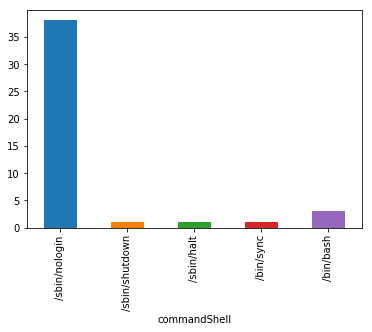

In [7]:
pandasDf["count"].plot(kind="bar")
plt.show()

# pie char

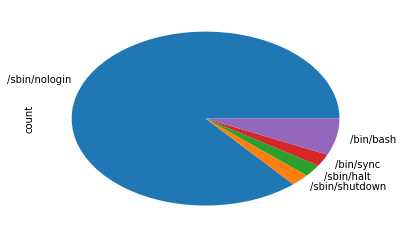

In [8]:
pandasDf["count"].plot(kind="pie")
plt.show()